<h1>1st Linear Regression using weather.csv dataset</h1>

<h1>Importing libraries</h1>

In [6]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings;warnings.simplefilter('ignore')
%matplotlib inline

Loading data

In [7]:
dt = pd.read_csv("C://Users//kktc//Desktop//school work//YEAR 2//PART 2.2//Machine learning//data sets//weather.csv")

In [8]:
dt.shape

(366, 22)

In [9]:
dt.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [12]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [10]:
dt.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


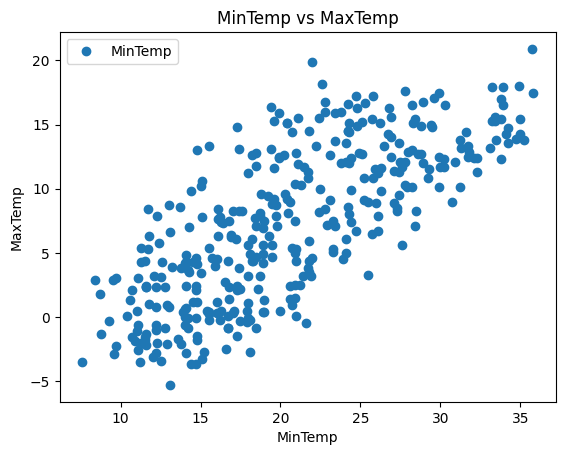

In [11]:
dt.plot(x="MaxTemp",y="MinTemp",style='o')
plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

MaxTemp distrubtion

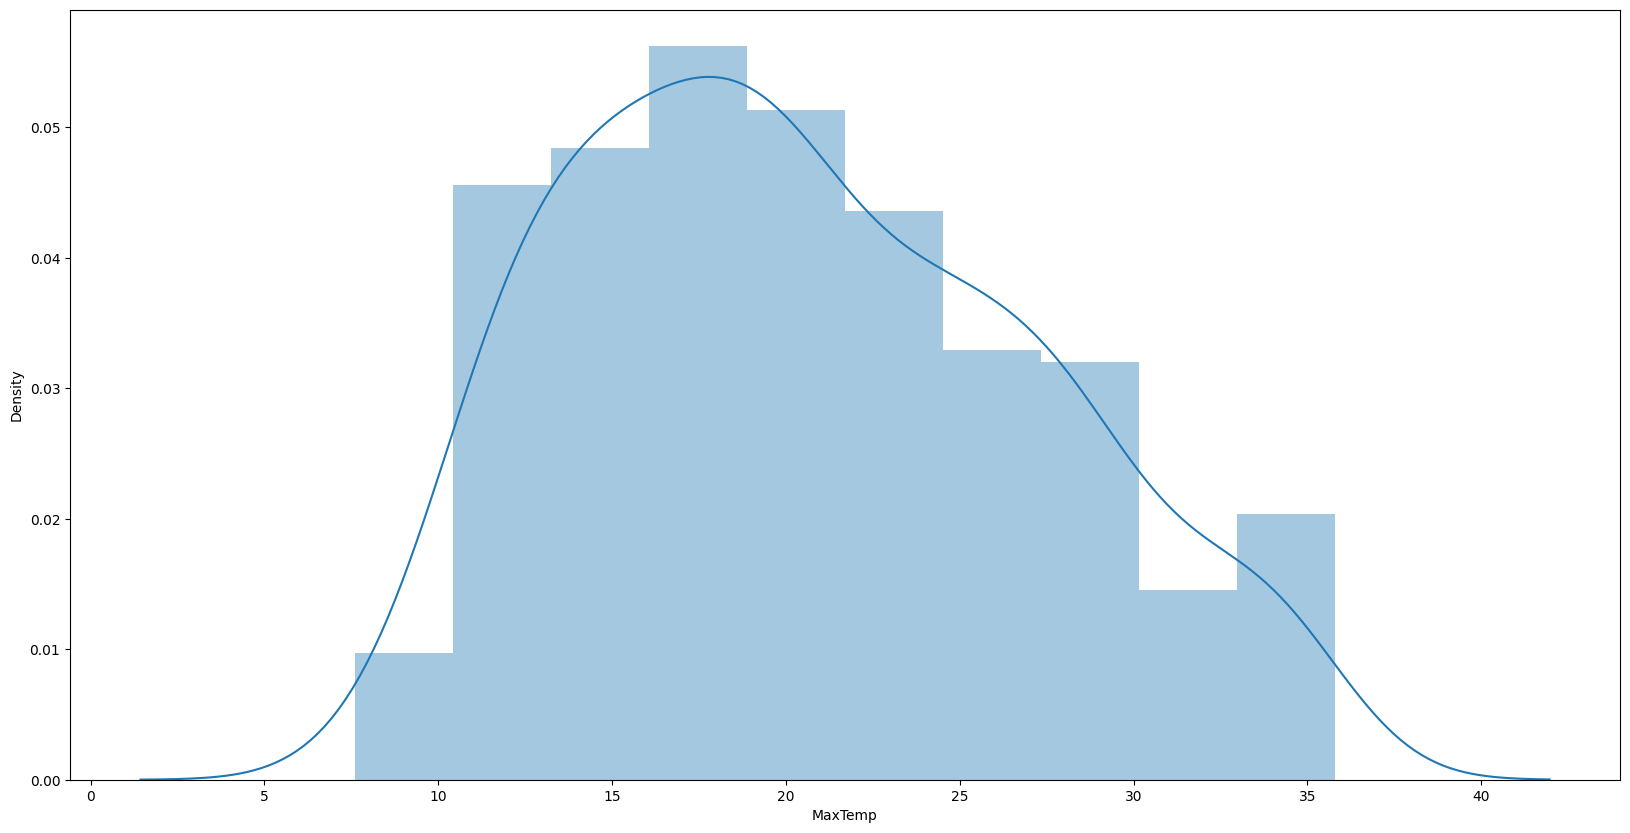

In [13]:
plt.figure(figsize=(20,10))
plt.tight_layout()
seabornInstance.distplot(dt['MaxTemp'])
plt.show()

Getting x and y

In [14]:
dt.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [16]:
X = dt['MinTemp'].values.reshape(-1,1)
y = dt['MaxTemp'].values.reshape(-1,1)

Splitting the data

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

Training Model

In [18]:
linearReg = LinearRegression()

In [19]:
linearReg = linearReg.fit(X_train,y_train)

Get intercept

In [20]:
print('Intercept: ',linearReg.intercept_)

Intercept:  [14.56202411]


Making Predictions

In [36]:
y_pred = linearReg.predict(X_test)

Intercept:  [14.56202411]


Comparing Values

In [38]:
dr=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})
dr

,Actual,Predicted
0,25.2,23.413030
1,11.5,13.086857
2,21.1,27.264856
3,22.2,25.461874
4,20.4,26.937041
...,...,...
69,18.9,20.216833
70,22.8,27.674625
71,16.1,21.446140
72,25.1,24.970151


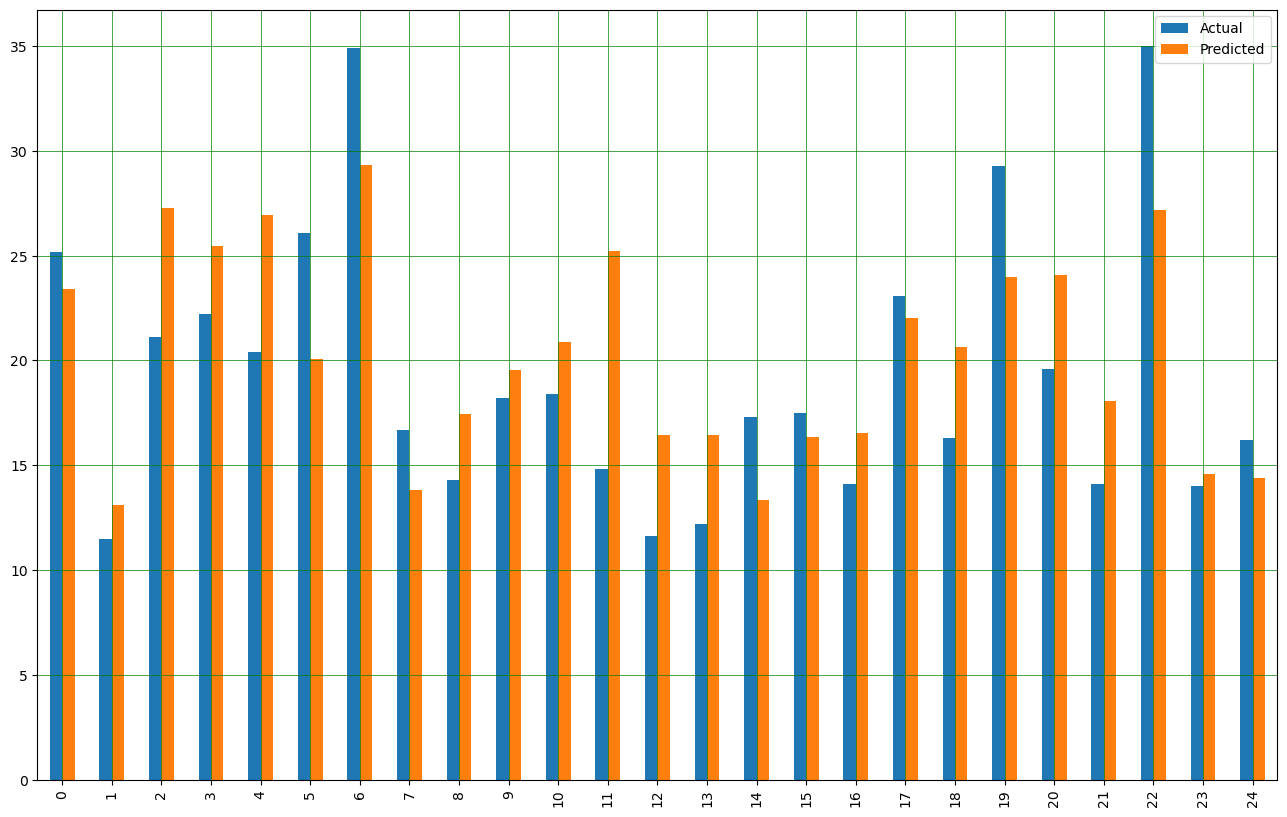

In [41]:
dr1=dr.head(25)
dr1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

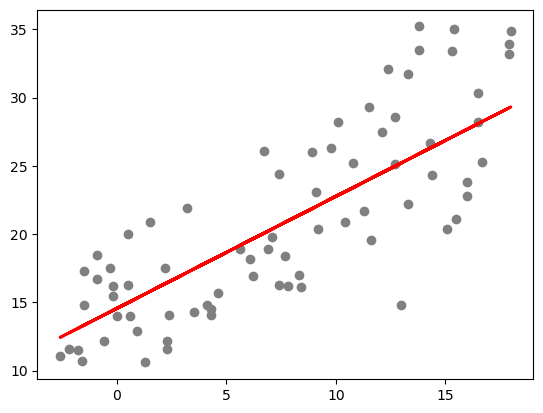

In [42]:
plt.scatter(X_test,y_test,color='gray')
plt.plot(X_test,y_pred,color='red',linewidth=2)
plt.show

Writting About the Accuracy score

In [44]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error:  3.5094353112899594
Mean Squared Error:  17.011877668640622
Root Mean Squared Error:  4.124545753006096


<h1>Weather Prediction System</h1>

In [27]:
min = int(input('What is the minimum temperature'))
min_arr = np.array(min).reshape(1, -1)
max = linearReg.predict(min_arr)
print('Maximum Temperature is:',max.flatten())

What is the minimum temperature 14


Maximum Temperature is: [26.03554981]


<h1>About Me</h1>
<div style="font-family: Arial, sans-serif; line-height: 1.6; font-size: 16px;">
  <p>
    My name is <strong>Godknows Nyandoro</strong>, a Computer Science student at the University of Zimbabwe. 
    Below are my contact details and professional profiles:
  </p>
  <ul>
    <li>WhatsApp: <a href="https://wa.me/263779319824" target="_blank">+263 779 319 824</a></li>
    <li>Email: <a href="mailto:godknowsnyandoro0410@gmail.com">godknowsnyandoro0410@gmail.com</a></li>
    <li>GitHub: <a href="https://github.com/Godknows-Jv" target="_blank">https://github.com/Godknows-Jv</a></li>
    <li>LinkedIn: <a href="https://www.linkedin.com/in/godknows-nyandoro-65a7a5320/" target="_blank">https://www.linkedin.com/in/godknows-nyandoro-65a7a5320/</a></li>
      <li>Portfolio Website: <a href="https://godknows-jv.github.io/Portfolio/" target="_blank">https://godknows-jv.github.io/Portfolio/</a></li>
  </ul>
  <p>
    Feel free to reach out or connect with me!
  </p>
</div>